In [1]:
import pandas as pd

<div class="alert alert-block alert-info">
<h2><center><strong>Analyse exploratoire du jeu de données Frames </strong></center></h2>
        
</div>

In [2]:
%load_ext pycodestyle_magic

In [3]:
%flake8_on

<div class="alert alert-block alert-success">  
<strong>1. Chargement du jeu de données<a id='head-1-2'></a> 📕 📗 📘 📙</strong>
        
</div>

*a) Initialisation des paramètres*

In [4]:
data_path = "data/frames.json"

**Le jeu de données est composé d'un fichier json.**

Il s'agit d'un ensemble de dialogues entre 12 partcipants sur une période de 20 jours. 

Grâce à une interface de tchat, deux humains conversent ensemble dans le but de trouver le meilleur deal pour réserver un voyage. Un joue le rôle de l'utilisateur et l'autre celui de l'agent de voyage.

*b) Chargement du fichier*

In [5]:
bot_conversation_df = pd.read_json(data_path)

Chaque dialogue est composé de 5 champs : 
- user_id 
- wizard_id 
- id
- labels
- turns

In [6]:
bot_conversation_df.head()

,user_id,turns,wizard_id,id,labels
0,U22HTHYNP,[{'text': 'I'd like to book a trip to Atlantis...,U21DKG18C,e2c0fc6c-2134-4891-8353-ef16d8412c9a,"{'userSurveyRating': 4.0, 'wizardSurveyTaskSuc..."
1,U21E41CQP,"[{'text': 'Hello, I am looking to book a vacat...",U21DMV0KA,4a3bfa39-2c22-42c8-8694-32b4e34415e9,"{'userSurveyRating': 3.0, 'wizardSurveyTaskSuc..."
2,U21RP4FCY,[{'text': 'Hello there i am looking to go on a...,U21E0179B,6e67ed28-e94c-4fab-96b6-68569a92682f,"{'userSurveyRating': 2.0, 'wizardSurveyTaskSuc..."
3,U22HTHYNP,[{'text': 'Hi I'd like to go to Caprica from B...,U21DKG18C,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."
4,U21E41CQP,"[{'text': 'Hello, I am looking to book a trip ...",U21DMV0KA,24603086-bb53-431e-a0d8-1dcc63518ba9,"{'userSurveyRating': 5.0, 'wizardSurveyTaskSuc..."


<div class="alert alert-block alert-success">  
<strong>2. Exploration générale<a id='head-1-2'></a></strong>
        
</div>

In [10]:
print(f'Le jeu de données comprend {bot_conversation_df.shape[0]} dialogues \
entre les utilisateurs et les "wizards"')

Le jeu de données comprend 1369 dialogues entre les utilisateurs et les "wizards"


In [11]:
print(f'Il y a en tout {bot_conversation_df["user_id"].nunique()} utilisateurs \
différents et {bot_conversation_df["wizard_id"].nunique()} wizards')

Il y a en tout 11 utilisateurs différents et 12 wizards


In [12]:
satisfaction_df = pd.json_normalize(bot_conversation_df['labels'])
satisfaction_df.head()

,userSurveyRating,wizardSurveyTaskSuccessful
0,4.0,True
1,3.0,True
2,2.0,False
3,5.0,True
4,5.0,True


In [17]:
print(f'La note moyenne donné par les utilisateurs est \
{round(satisfaction_df["userSurveyRating"].mean(),2)}/5')

La note moyenne donné par les utilisateurs est 4.57/5


In [19]:
print(f'Le wizard arrive à aider l utilisateur dans \
{round(satisfaction_df["wizardSurveyTaskSuccessful"].mean()*100,1)} % des cas')

Le wizard arrive à aider l utilisateur dans 94.0 % des cas


<div class="alert alert-block alert-success">  
<strong>3. La colonne Turns<a id='head-1-2'></a></strong>
        
</div>

Maintenant le jeu de données sera uniquement analyser grâce au json (sans passer par le dataframe) : 

*a) On filtre sur la colonne turns*

In [20]:
turns_serie = bot_conversation_df['turns']

In [21]:
turns_list = turns_serie.to_list()

In [22]:
turns_list[0][]

[{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
  'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
     'name': 'inform'},
    {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
      {'val': 'Caprica', 'key': 'or_city'},
      {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
      {'val': '8', 'key': 'n_adults'},
      {'val': '1700', 'key': 'budget'}],
     'name': 'inform'}],
   'active_frame': 1,
   'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
      'budget': [{'val': '1700.0', 'negated': False}],

Chaque valeur de turns_list correspond à une conversation en entier 

Une conversation est une liste de plusieurs dialogues

Par exemple, ci dessous, le 1er dialogue de la premiere conversation :

In [65]:
turns_list[0]

{'text': "I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.",
 'labels': {'acts': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'acts_without_refs': [{'args': [{'val': 'book', 'key': 'intent'}],
    'name': 'inform'},
   {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
     {'val': 'Caprica', 'key': 'or_city'},
     {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
     {'val': '8', 'key': 'n_adults'},
     {'val': '1700', 'key': 'budget'}],
    'name': 'inform'}],
  'active_frame': 1,
  'frames': [{'info': {'intent': [{'val': 'book', 'negated': False}],
     'budget': [{'val': '1700.0', 'negated': False}],
     'dst_city': [{

In [66]:
turns_list[0][0].keys()

dict_keys(['text', 'labels', 'author', 'timestamp'])

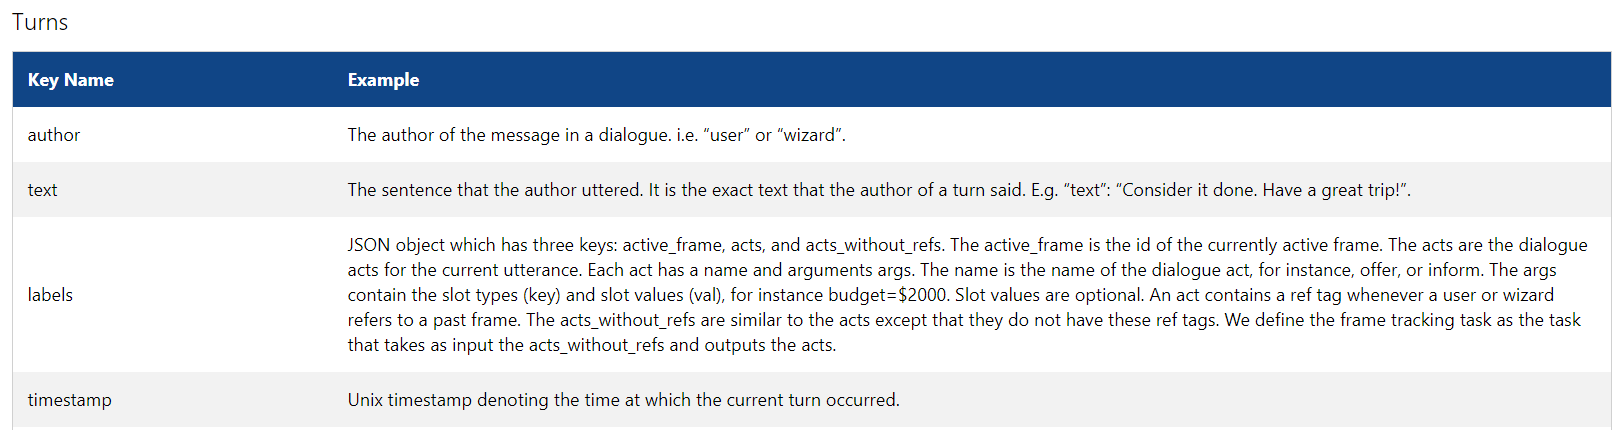

**1- l'utilisateur**

Pour la suite, nous récupèrerons uniquement les dialogues dont author = "user".

Cette valeur est présente dans :

In [68]:
turns_list[0][0]['author']

'user'

**2- Le texte du dialogue**

Nous aurons besoin aussi du texte du dialogue :

In [69]:
turns_list[0][0]['text']

"I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700."

<div class="alert alert-block alert-success">  
<strong>4. Les labels<a id='head-1-2'></a></strong>
        
</div>

In [71]:
type(turns_list[0][0]['labels'])

dict

In [73]:
labels_dict =turns_list[0][0]['labels']

In [74]:
labels_dict.keys()

dict_keys(['acts', 'acts_without_refs', 'active_frame', 'frames'])

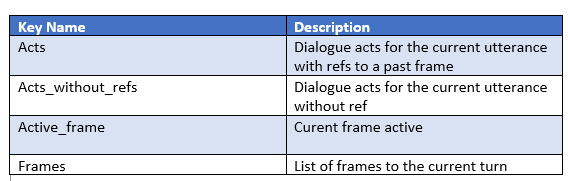

On choisit "acts" qui contient les informations qui nous intéressent pour entrainer luis :

In [75]:
labels_dict['acts']

[{'args': [{'val': 'book', 'key': 'intent'}], 'name': 'inform'},
 {'args': [{'val': 'Atlantis', 'key': 'dst_city'},
   {'val': 'Caprica', 'key': 'or_city'},
   {'val': 'Saturday, August 13, 2016', 'key': 'str_date'},
   {'val': '8', 'key': 'n_adults'},
   {'val': '1700', 'key': 'budget'}],
  'name': 'inform'}]

In [77]:
type(labels_dict['acts'])

list

Chaque act contient une liste des valeurs/paramètres que l'on désire récupérer sous la forme clé/valeur

In [78]:
labels_dict['acts'][0]

{'args': [{'val': 'book', 'key': 'intent'}], 'name': 'inform'}

In [79]:
labels_dict['acts'][0]['args']

[{'val': 'book', 'key': 'intent'}]

**La clé :** 

In [86]:
labels_dict['acts'][0]['args'][0]['key']

'intent'

**Sa valeur :** 

In [85]:
labels_dict['acts'][0]['args'][0]['val']

'book'

Petite subtilité, parfois les valeurs sont comprises dans les annotations car ils font référence à des valeurs données dans les précédents dialogues

Par exemple, si on prend le 2ème dialogue de l'utilisateur (conversation 1)

In [102]:
print(f'1er dialogue : \n{turns_list[0][0]["text"]}')
print("")
print(f'2eme dialogue : \n{turns_list[0][2]["text"]}')


1er dialogue : 
I'd like to book a trip to Atlantis from Caprica on Saturday, August 13, 2016 for 8 adults. I have a tight budget of 1700.

2eme dialogue : 
Yes, how about going to Neverland from Caprica on August 13, 2016 for 5 adults. For this trip, my budget would be 1900.


En effet l'utilisateur a déjà dit qu'il désirait aller à Caprica le 13 aout 2016 

**Mais** le lieu de départ, le nombre de personne ainsi que le budget ont changé

In [93]:
labels_dict =turns_list[0][2]['labels']

In [94]:
labels_dict['acts']

[{'args': [{'val': 'Neverland', 'key': 'dst_city'},
   {'val': '5', 'key': 'n_adults'},
   {'val': '1900', 'key': 'budget'},
   {'val': [{'annotations': [{'val': 'Caprica', 'key': 'or_city'},
       {'val': 'August 13, 2016', 'key': 'str_date'}],
      'frame': 1,
      'fromrange': False}],
    'key': 'ref'}],
  'name': 'inform'}]

Les valeurs qui n'ont pas changés sont dans annotations : 

In [106]:
labels_dict['acts'][0]['args'][3]

{'val': [{'annotations': [{'val': 'Caprica', 'key': 'or_city'},
    {'val': 'August 13, 2016', 'key': 'str_date'}],
   'frame': 1,
   'fromrange': False}],
 'key': 'ref'}

In [111]:
labels_dict['acts'][0]['args'][3]['val'][0]['annotations']

[{'val': 'Caprica', 'key': 'or_city'},
 {'val': 'August 13, 2016', 'key': 'str_date'}]

Avec pour le même principe, la **clé** :

In [113]:
labels_dict['acts'][0]['args'][3]['val'][0]['annotations'][0]['key']

'or_city'

et la **valeur** associée :

In [114]:
labels_dict['acts'][0]['args'][3]['val'][0]['annotations'][0]['val']

'Caprica'